<a href="https://colab.research.google.com/github/guoyunqian/Public_guo_code/blob/master/test01_190305.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!ls /
!pwd


bin   content  dev  home  lib32  media	opt   root  sbin  swift  tmp	usr
boot  datalab  etc  lib   lib64  mnt	proc  run   srv   sys	 tools	var


In [7]:
##从网站http直接wget下载数据
url = "http://data.cityofdenton.com/dataset/17695047-0aeb-46a2-a9db-66847743ed1c/resource/d356a409-6764-46d7-942d-4d5a7ffb1c28/download/crime_data_20190301.csv"
!wget {url}

/content


In [22]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

In [24]:
##### 从Google Drive云中导入数据
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. 从Google云中，通过共享的id号及文件名下载文件至
file_id = "1OJrDtvY-uTjf7RHjRnpR9DNZg2wv5rUP"
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('train.csv')
print('Downloaded content "{}"'.format(downloaded.GetContentString()))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
import pandas as pd

In [31]:
df = pd.read_csv(r"train.csv")
df.head()
df.crime.value_counts().iloc[:30]

SIMPLE ASSAULT                                 8151
ALL OTHER LARCENY                              7822
DRUNKENNESS                                    6692
DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY       6690
SHOPLIFTING                                    5913
THEFT FROM MOTOR VEHICLE                       5612
DRUG/NARCOTIC VIOLATIONS                       5015
FALSE PRETENSE/SWINDLE/CONFIDENCE GAME         4677
BURGLARY/BREAKING AND ENTERING                 4482
DRIVING UNDER THE INFLUENCE                    4447
ALL OTHER OFFENSES                             4298
DRUG EQUIPMENT VIOLATIONS                      2336
THEFT OF MOTOR VEHICLE PARTS OR ACCESSORIES    2163
THEFT FROM BUILDINGS                           1538
DISORDERLY CONDUCT                             1529
MOTOR VEHICLE THEFT                            1501
AGGRAVATED ASSAULT                             1450
FRAUD CREDIT CARD/AUTOMATED TELLER MACHINES    1325
FORGERY/COUNTERFEITING                         1264
LIQUOR LAW V

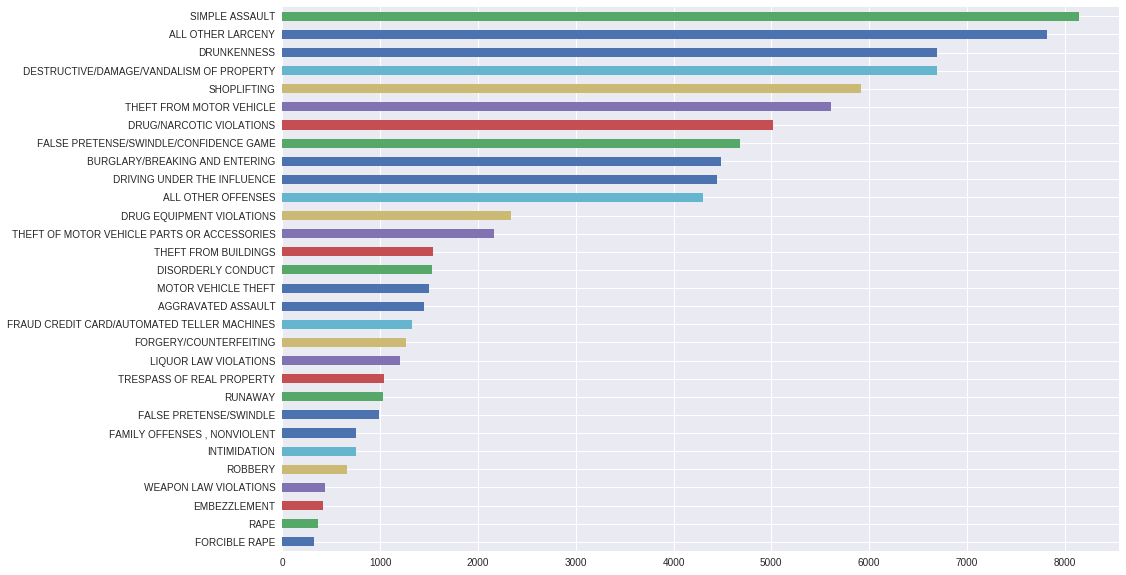

In [35]:
%matplotlib inline
df.crime.value_counts().iloc[:30].sort_values().plot(kind='barh',figsize=(15,10))

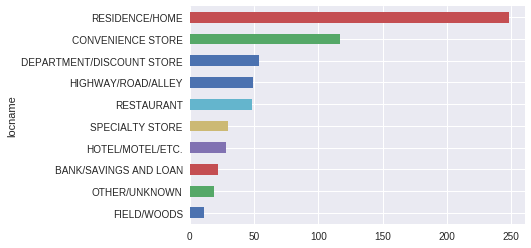

In [36]:
robbery = df[df.crime.str.contains('ROBBERY')]; robbery.head()
robbery.shape
robbery.groupby('locname').size().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')

In [37]:
regex = r"\d+XX\s(?P<street>.*)"
subst = "\\g<street>"
robbery["street"] = robbery.publicadress.str.replace(regex, subst)
robbery.groupby('street').size().sort_values(ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


street
W UNIVERSITY DR    54
S I35E             44
E MCKINNEY ST      30
S LOOP 288         27
TEASLEY LN         26
I35                20
FORT WORTH DR      20
W OAK ST           17
BERNARD ST         13
N ELM ST           12
dtype: int64

In [38]:
!pip install python-dateutil
from dateutil.parser import *
robbery["year"] = robbery.incidentdatetime.apply(lambda x: parse(x).year)
robbery["month"] = robbery.incidentdatetime.apply(lambda x: parse(x).month)
robbery["hour"] = robbery.incidentdatetime.apply(lambda x: parse(x).hour)
robbery.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,crime,locname,incidentdatetime,publicadress,agency,accuracy,street,year,month,hour
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address,BRINKER RD,2010,1,16
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address,BERNARD ST,2010,1,16
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address,TEASLEY LN,2010,1,22
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address,W SYCAMORE ST,2010,2,23
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address,S I35E,2010,2,19


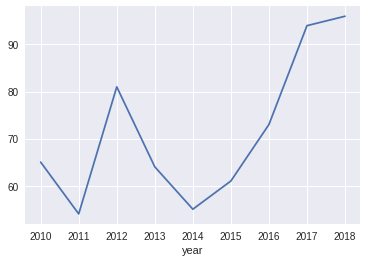

In [41]:
robbery = robbery[~(robbery.year == 2019)]
robbery.groupby('year').size().plot()


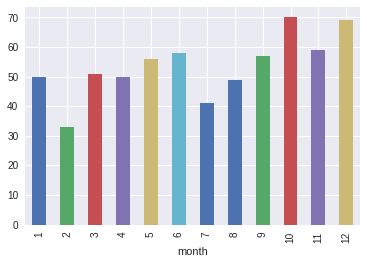

In [40]:
robbery.groupby('month').size().plot(kind='bar')

In [42]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0).fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78cacfe048>,
      dtype=object)

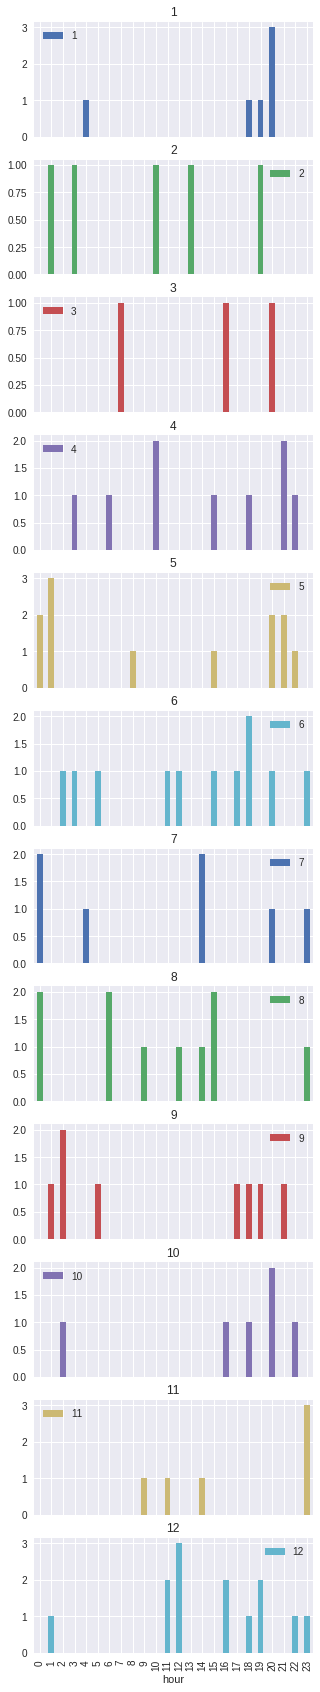

In [43]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0).fillna(0).plot(subplots=True, kind='bar', figsize=(5,30))